# Lab 1 - kNN and Bias-Variance Tradeoff

- Your name: Đái Triệu Phi

- Your student code: 21133068


# I. Hướng dẫn


## 1. Minh họa bias-variance tradeoff với k-NN cho hồi quy


### 1.1. Tìm hiểu tổng quan về dữ liệu

Phần này sẽ dùng tập dữ liệu `boston` để minh họa. Tập dữ liệu này có một số thông tin sau:

## Boston house prices dataset

**Data Set Characteristics:**

- Number of Instances: 506

- Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

- Attribute Information (in order):

  - CRIM per capita crime rate by town
  - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
  - INDUS proportion of non-retail business acres per town
  - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  - NOX nitric oxides concentration (parts per 10 million)
  - RM average number of rooms per dwelling
  - AGE proportion of owner-occupied units built prior to 1940
  - DIS weighted distances to five Boston employment centres
  - RAD index of accessibility to radial highways
  - TAX full-value property-tax rate per \$10,000
  - PTRATIO pupil-teacher ratio by town
  - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  - LSTAT % lower status of the population
  - MEDV Median value of owner-occupied homes in $1000's

- Missing Attribute Values: None

- Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980. N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.

**References**

- Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
- Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

#### 1.1.1. Load dữ liệu


In [14]:
import pandas as pd

boston = pd.read_csv("./Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### 1.1.2. Chuẩn bị dữ liệu


In [15]:
y = boston["medv"]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [16]:
inputCols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']
X = boston[inputCols]
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### 1.2. Chia dữ liệu

Ta sẽ chia dữ liệu làm 2 tập train và test với tỷ lệ 70/30.


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 506
Labels counts in y_train: 354
Labels counts in y_test: 152


### 1.3. Fit mô hình và trực quan hóa kết quả

Phần này ta sẽ đánh giá và vẽ biểu đồ kết quả của mô hình k-NN trên tập test với $k \in \{ 1, 5, 10, 15, 20, 25, 30 \}$ dùng độ đo `mean squared error (MSE)`.


Text(0, 0.5, 'MSE')

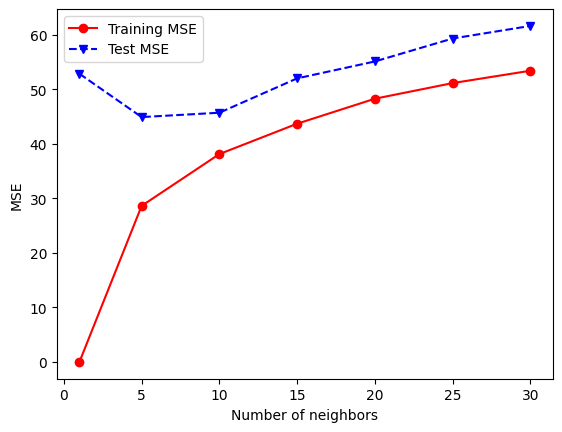

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainMSE = []
testMSE = []

for k in numNeighbors:
    reg = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    reg.fit(X_train, y_train)
    y_predTrain = reg.predict(X_train)
    y_predTest = reg.predict(X_test)
    trainMSE.append(mean_squared_error(y_train, y_predTrain))
    testMSE.append(mean_squared_error(y_test, y_predTest))

plt.plot(numNeighbors, trainMSE, 'ro-', numNeighbors, testMSE,'bv--')
plt.legend(['Training MSE','Test MSE'])
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')

**Nhận xét**

- Khi $k = 1$ mô hình cho kết quả (MSE) trên tập train rất tốt nhưng kết quả trên tập test khá cao. Mô hình có dấu hiệu overfitting.

- Khi tăng $k$ lên ($k \in \{5, 10 \}$) kết quả trên tập train tăng lên nhưng kết quả trên tập test lại giảm xuống (so với $k = 1$). Do đó, miền giá trị $k \in [5, 10]$ có khả năng là miền giá trị mà mô hình cho kết quả tốt (good fit).

- Khi tăng $k$ lên nữa ($k \in \{15, 20, 25, 30\}$) kết quả trên tập train tăng lên và kết quả trên tập test có khuynh hướng tăng lên. Do đó, miền giá trị $k \in [15, 30]$ nhiều khả năng là miền giá trị mà mô hình bị underfitting.


# II. Bài tập


## Bài tập 1. Áp dụng thuật toán k-NN

Cho dữ liệu huấn luyện (training data) như bảng bên dưới:

| $x_1$ | $x_2$ | $y$ |
| ----- | ----- | --- |
| 1     | 0.5   | 1   |
| 2     | 1     | 1   |
| 2.5   | 2     | 1   |
| 3     | 2     | 1   |
| 1.5   | 2     | -1  |
| 2.5   | 3     | -1  |
| 1     | 2     | -1  |
| 1     | 1     | -1  |

Ta muốn sử dụng tập dữ liệu huấn luyện ở trên để đưa ra dự đoán, $\hat{y}$, cho điểm dữ liệu kiểm tra không được gắn nhãn $x = (2.5, 1)$ sử dụng thuật toán k-NN.


1. Tính khoảng cách Eucledian giữa mỗi quan sát và điểm kiểm tra, $x = (2.5, 1)$ (tạo thêm cột $d$ mô tả khoảng cách giữa các điểm dữ liệu trong tập huấn luyện với điểm kiểm tra, $x = (2.5, 1)$, và điền giá trị vào cột này). Xuất kết quả ra như bảng bên dưới (giá trị cột $d$ là khoảng cách tính được).

Tham khảo thêm về thư viện `numpy` ở: https://cs231n.github.io/python-numpy-tutorial/


**Trả lời**


1.a. Định nghĩa hàm tính khoảng cách Eucledian theo công thức sau:

$$d(u, v) = \sqrt{\sum_{i = 1}^{n} (u_i - v_i)^2}$$


In [19]:
def EuclideanDistance(u, v):
    '''
        Calculate the Eucledian distance of vector u and v
    '''
    ## BEGIN YOUR CODE
    
    # Tính hiệu giữa hai vector
    diff = np.array(u) - np.array(v)
    
    # Tính bình phương của từng phần tử trong hiệu
    sq_diff = np.square(diff)
    
    # Tính tổng của các bình phương này
    sum_sq_diff = np.sum(sq_diff)
    
    # Tính căn bậc hai của tổng bình phương để có khoảng cách Euclidean
    distance = np.sqrt(sum_sq_diff)
    
    return distance

u = (1, 2, 3)
v = (4, 2, 7)
print("EuclideanDistance(u, v) = ", EuclideanDistance(u, v))

    ## END YOUR CODE

EuclideanDistance(u, v) =  5.0


1.b. Tính khoảng cách Eucledian giữa mỗi quan sát và điểm kiểm tra, 𝑥=(2.5,1)


In [20]:
import numpy as np

x = np.array([2.5, 1])

X = np.array([[1, 0.5],
              [2, 1],
              [2.5, 2],
              [3, 2],
              [1.5, 2],
              [2.5, 3],
              [1, 2],
              [1, 1]])
y = np.array(['1','1','1','1','-1','-1','-1','-1'])



| $x_1$ | $x_2$ | $y$ | $d$ |
| ----- | ----- | --- | --- |
| 1     | 0.5   | 1   |     |
| 2     | 1     | 1   |     |
| 2.5   | 2     | 1   |     |
| 3     | 2     | 1   |     |
| 1.5   | 2     | -1  |     |
| 2.5   | 3     | -1  |     |
| 1     | 2     | -1  |     |
| 1     | 1     | -1  |     |


In [21]:
# Tính khoảng cách Euclidean giữa điểm kiểm tra và từng điểm trong tập huấn luyện
distances = np.sqrt(np.sum((X - x)**2, axis=1))

# Kết hợp X, y và distances thành một bảng kết quả
result = np.column_stack((X, y, distances))

# In kết quả
print("x1\t x2\t y\t  d")
for row in result:
    print(f"{row[0]:<5}\t{row[1]:<5}\t{row[2]:<5}\t{float(row[3]):.2f}")

x1	 x2	 y	  d
1.0  	0.5  	1    	1.58
2.0  	1.0  	1    	0.50
2.5  	2.0  	1    	1.00
3.0  	2.0  	1    	1.12
1.5  	2.0  	-1   	1.41
2.5  	3.0  	-1   	2.00
1.0  	2.0  	-1   	1.80
1.0  	1.0  	-1   	1.50


2. Cho biết dự đoán của thuật toán $k$-NN cho $x = (2.5, 1)$ khi $k = 1$? Tại sao?


**Trả lời**

> Với \( k = 1 \), thuật toán chọn điểm huấn luyện gần nhất (là \( (2, 1) \)) làm dự đoán. Nhãn của điểm gần nhất là **1**, nên dự đoán cho \( x \) cũng là **1**.


3. Cho biết dự đoán của thuật toán $k$-NN cho $x = (2.5, 1)$ khi $k = 3$? Tại sao?


**Trả lời**

> 3 điểm gần nhất đều có nhãn **1** (không có điểm nào nhãn **-1**), nên dự đoán dựa vào đa số nhãn là **1**.


## Bài tập 2: Hiện thực thuật toán k-NN

Ở bài tập này, bạn sẽ tự hiện thực thuật toán 1-NN (k = 1). Sau đó, bạn sẽ thử nghiệm thuật toán với tập dữ liệu `iris` từ thư viện `sklearn.datasets`. Phần bên dưới là các đoạn mã làm mẫu có một số chỗ còn chừa trống để bạn viết thêm vào.


### 2.1. Load và khám phá tổng quan về dữ liệu


In [22]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### 2.2. Xáo trộn ngẫu nhiên và chia dữ liệu


In [23]:
# Shuffle the data
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, y = X[shuffle], y[shuffle]

# Split data into train and test set
train_data, train_labels = X[:100], y[:100]
test_data, test_labels = X[100:], y[100:]

### 2.3. Định nghĩa lớp NearestNeighborClassifier

Để đơn giản, bạn chỉ cần cài đặt thuật toán k-NN cho bài toán phân loại với k = 1.


In [24]:
class NearestNeighborClassifier:
    # Constructor
    def __init__(self, metric = EuclideanDistance):
        self.metric = metric
    
    # No training for Nearest Neighbors, just store the data
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test instance and return results
    def predict(self, test_data):
        results = []
        for instance in test_data:
            results.append(self._predict_instance(instance))
        return results
    
    # Private function for making a single prediction
    def _predict_instance(self, instance):
        ## BEGIN YOUR CODE

        return None
        ## END YOUR CODE

### 2.4. Thử nghiệm NearestNeighborClassifier


In [25]:
nn = NearestNeighborClassifier()
nn.fit(train_data, train_labels)
preds = nn.predict(test_data)

total = len(preds)
correct = 0
for pred, label in zip(preds, test_labels):
    if pred == label: correct += 1

print("total: %d, correct: %d, accuracy: %3.2f" %(total, correct, 1.0*correct/total))

total: 50, correct: 0, accuracy: 0.00


## Bài tập 3. Minh họa bias-variance tradeoff với k-NN cho phân loại


### 3.1. Chia dữ liệu

Ta sẽ tiếp tục dùng tập dữ liệu `iris` từ thư viện `sklearn.datasets` cho các yêu cầu bên dưới.

Chia dữ liệu thành 2 tập train và test với tỷ lệ 80/20. Sử dụng thêm tham số `stratify` để đảm bảo phân bố lớp (giá trị của thuộc tính $y$) trên tập train và tập test là xấp xỉ bằng nhau. In ra số lượng phần tử của tập train và tập test.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [26]:
# WRITE YOUR CODE HERE
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Tải dữ liệu iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Chia dữ liệu thành tập train và test với tỷ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

# In ra số lượng phần tử của tập train và tập test
print('Số lượng phần tử trong tập train:', len(X_train))
print('Số lượng phần tử trong tập test:', len(X_test))


Số lượng phần tử trong tập train: 120
Số lượng phần tử trong tập test: 30


### 3.2 Chuẩn hóa dữ liệu

Sử dụng lớp `StandardScaler` của thư viện `sklearn.preprocessing` để chuẩn hóa dữ liệu trên tập train và tập test.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [27]:
# WRITE YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chỉ chuẩn hóa tập train
X_train_scaled = scaler.fit_transform(X_train)

# Dùng scaler đã fit để chuẩn hóa tập test
X_test_scaled = scaler.transform(X_test)

# Kiểm tra các giá trị đã chuẩn hóa
print("Giá trị đầu vào sau khi chuẩn hóa (tập train):")
print(X_train_scaled[:5])  # In 5 mẫu đầu tiên trong tập train đã chuẩn hóa

print("\nGiá trị đầu vào sau khi chuẩn hóa (tập test):")
print(X_test_scaled[:5])  # In 5 mẫu đầu tiên trong tập test đã chuẩn hóa


Giá trị đầu vào sau khi chuẩn hóa (tập train):
[[-1.24201895 -0.11044759 -1.32477899 -1.1883386 ]
 [-1.12457035 -0.11044759 -1.32477899 -1.319285  ]
 [-1.71181335 -0.11044759 -1.38093352 -1.319285  ]
 [-1.00712175  0.78810904 -1.26862446 -1.319285  ]
 [-0.06753295 -0.78436505  0.0790843  -0.00982098]]

Giá trị đầu vào sau khi chuẩn hóa (tập test):
[[-0.41987875  1.0127482  -1.38093352 -1.319285  ]
 [-0.18498155 -0.5597259   0.41601149  0.12112542]
 [-0.88967315  1.68666566 -1.04400633 -1.0573922 ]
 [ 0.28481286 -1.00900421  1.03371133  0.25207182]
 [-0.88967315  0.78810904 -1.26862446 -1.319285  ]]


### 3.3. Fit mô hình và trực quan hóa kết quả

Đánh giá và vẽ biểu đồ kết quả của mô hình k-NN trên tập test với $k \in \{ 1, 5, 10, 15, 20, 25, 30 \}$ dùng độ đo `Accuracy`.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


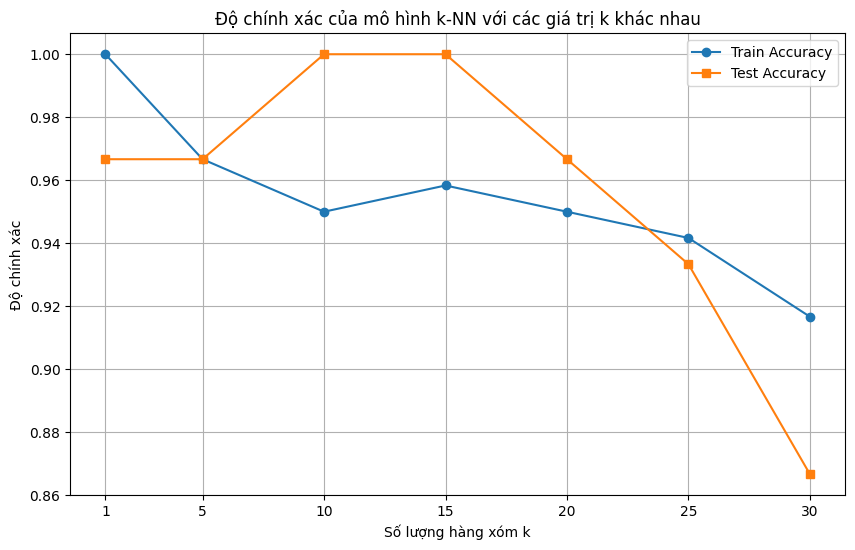

In [28]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Danh sách các giá trị k
k_values = [1, 5, 10, 15, 20, 25, 30]
train_accuracies = []
test_accuracies = []

# Huấn luyện và đánh giá mô hình k-NN cho mỗi giá trị của k
for k in k_values:
    # Tạo mô hình k-NN
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Huấn luyện mô hình
    knn.fit(X_train_scaled, y_train)
    
    # Dự đoán nhãn cho tập train
    y_train_pred = knn.predict(X_train_scaled)
    
    # Dự đoán nhãn cho tập test
    y_test_pred = knn.predict(X_test_scaled)
    
    # Tính toán độ chính xác cho cả hai tập
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Vẽ biểu đồ độ chính xác
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy')
plt.title('Độ chính xác của mô hình k-NN với các giá trị k khác nhau')
plt.xlabel('Số lượng hàng xóm k')
plt.ylabel('Độ chính xác')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()


**Nhận xét**


1. **Độ Chính xác**: 
   - Độ chính xác trên tập train cao hơn so với tập test(trong khoản k = (25-30)), phản ánh hiện tượng quá khớp (overfitting).
   - Độ chính xác trên tập train thấp hơn so với tập test(trong khoản k = (5-25)), phản ánh hiện tượng quá khớp (Underfitting).
   - k = 5 Mô hình có thể đang hoạt động tốt trên cả hai tập dữ liệu, cho thấy rằng nó đã học được cấu trúc chính xác của dữ liệu mà không bị quá khớp (overfitting) hoặc quá đơn giản (underfitting).

2. **Tác động của \( k \)**: Khi \( k \) nhỏ, mô hình nhạy cảm với nhiễu; khi \( k \) lớn, độ chính xác trên tập test cải thiện nhưng có thể giảm nếu quá lớn.



## Bài tập 4. Chẩn đoán bias-variance dùng learning curves

### 4.1. Vẽ learning curves

Sử dụng tập train và test của tập dữ liệu `iris` ở bước 2.2 của bài tập 2, hãy vẽ learning curves cho mô hình k-NN (k = 5).

Tham khảo: https://scikit-learn.org/stable/modules/learning_curve.html


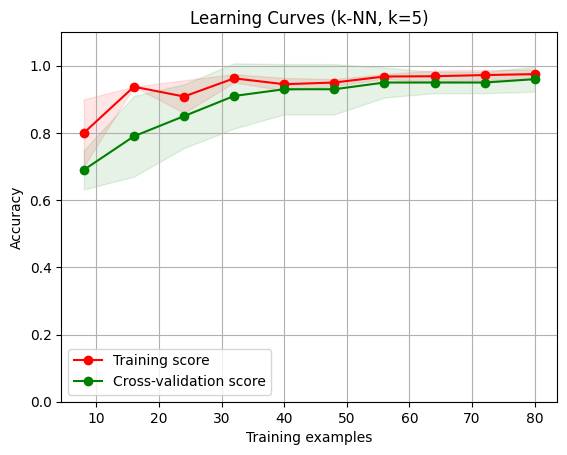

In [30]:
# WRITE YOUR CODE HERE
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Tạo mô hình k-NN
knn = KNeighborsClassifier(n_neighbors=5)

# Tính learning curves
train_sizes, train_scores, test_scores = learning_curve(
    knn, train_data, train_labels, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tính toán độ chính xác trung bình và độ lệch chuẩn
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Vẽ biểu đồ
plt.figure()
plt.title("Learning Curves (k-NN, k=5)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
plt.grid()

# Vẽ learning curves cho tập train
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Vẽ learning curves cho tập test
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


### 4.2. Chuẩn đoán bias-variance dùng learning curves

Dựa vào learning curves vẽ được ở câu 3.1, hãy chuẩn đoán xem mô hình có đang bị bias hay variance hay cả hai? Giải thích?


Kết quả và nhận xét:

- Trong khoảng [10 - 40] của "Trainning examples"  đường cong huấn luyện (đỏ) cao hơn đường cong kiểm định (xanh) tuy nhiên chênh lệch không quá lớn. 

- Trong khoảng [40 - 80] của "Trainning examples"  đường cong huấn luyện (đỏ) và đường cong kiểm định (xanh) gần nhau và cả hai đều cao, mô hình hoạt động tốt với độ chính xác cao và không có vấn đề về bias hoặc variance.
  
